In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each 
# regimen 

tumorvol_mean = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumorvol_median = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumorvol_variance = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumorvol_std = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumorvol_SEM = mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumorvol_summary_df = pd.DataFrame({"Tumor Volume: mean":tumorvol_mean, "Tumor Volume: median":tumorvol_median,
    "Tumor Volume: variance": tumorvol_variance ,"Tumor Volume: standard deviation": tumorvol_std,
    "Tumor Volume: SEM": tumorvol_SEM})
tumorvol_summary_df

,Tumor Volume: mean,Tumor Volume: median,Tumor Volume: variance,Tumor Volume: standard deviation,Tumor Volume: SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Points')

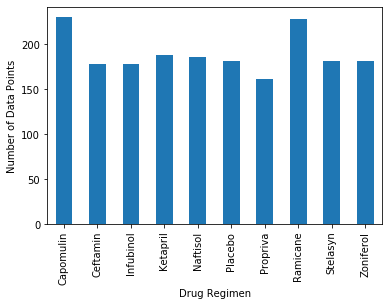

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
datapoints_per_regimen = mouse_study.groupby(["Drug Regimen"])["Drug Regimen"].count()
datapoints_bar = datapoints_per_regimen.plot(kind="bar")
datapoints_bar.set_ylabel("Number of Data Points")

Text(0.5, 0, 'Drug Regimen')

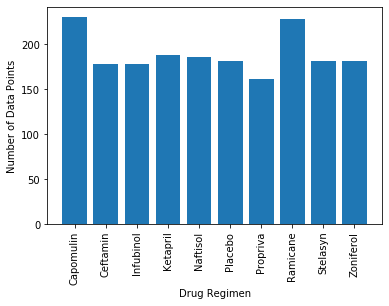

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot 
regimens = ("Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn",
    "Zoniferol")
plt.bar(regimens, datapoints_per_regimen, align="center")
plt.xticks(rotation="vertical")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

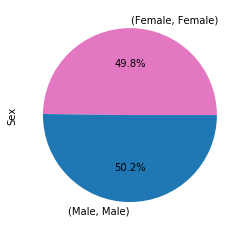

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_gender = mouse_metadata.groupby(["Sex"])
mouse_gender_divide = mouse_gender["Sex"].value_counts()

mouse_gender_pie = mouse_gender_divide.plot(kind="pie", colors=["tab:pink", "tab:blue"], autopct="%1.1f%%")

# hot to get rid of the (female,female) thing to just Female?

<function matplotlib.pyplot.show(*args, **kw)>

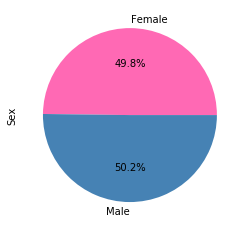

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender_divide, explode=(0,0), labels = ["Female", "Male"], colors=["hotpink", "steelblue"],autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and 
# quantitatively determine if there are any potential outliers.
# mostpromisingtreatments = 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin 

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen 

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the
# Capomulin regimen 

In [ ]:
# https://github.com/ancleveland/matplotlib-challenge/blob/master/pymaceuticals_Cleveland.ipynb